In [3]:
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm
import os
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
path = 'pkls/'
files = os.listdir(path)
len(files)

15

In [5]:
from social_phi import get_signal,experiment_hop_range

def flatten(l : list):
    return [item for sublist in l for item in sublist]

def extract_data(data):
    act = flatten(data['activities'].values())
    sig = get_signal(data['activities'], time_scale=24*3600, binarize=True)
    stats = experiment_hop_range(sig=sig, window=30, min_hop=1, max_hop=15, silent=True)
    
    return {
        'forks' : len(data['forks']),
        'issues' : len(data['issues']),
        'stars' : len(data['stars']),
        'users' : len(data['activities']),
        'commits' : len(act),
        'avg_phi' : max(stats['avg_phi']),
        'timeline' : (max(act) - min(act)) // (24*3600)
    }

In [7]:
df = pd.DataFrame(columns=['forks', 'stars', 'issues', 'users', 'commits', 'avg_phi', 'timeline'])
all_data = []
for file in tqdm(files):
    data = pickle.load(open(path + file, 'rb'))
    all_data += [data]
    df = df.append(extract_data(data), ignore_index=True)

df = df.astype(float)
df.head()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


,forks,stars,issues,users,commits,avg_phi,timeline
0,2658.0,16305.0,1678.0,486.0,8371.0,0.865986,1958.0
1,7285.0,39139.0,907.0,578.0,7475.0,1.133488,2178.0
2,4061.0,14845.0,1507.0,706.0,23083.0,0.886885,4855.0
3,10887.0,37338.0,12.0,75.0,1342.0,1.543297,1278.0
4,12279.0,30083.0,3665.0,2322.0,25171.0,0.840441,4340.0


In [8]:
df.describe()

,forks,stars,issues,users,commits,avg_phi,timeline
count,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000
mean,6878.600000,26544.000000,1402.000000,775.266667,16563.266667,1.109419,3203.133333
std,5477.440041,11236.736848,1668.490378,681.635058,14564.091485,0.250737,1601.532697
min,1378.000000,5530.000000,12.000000,75.000000,1342.000000,0.840441,1278.000000
25%,3845.500000,16861.000000,402.500000,262.000000,4436.000000,0.895846,2114.000000
50%,5518.000000,30083.000000,907.000000,495.000000,11882.000000,1.097988,2768.000000
75%,7821.000000,37120.000000,1592.500000,1268.500000,25185.000000,1.244811,4219.500000
max,23094.000000,39900.000000,6313.000000,2322.000000,52223.000000,1.589701,7122.000000


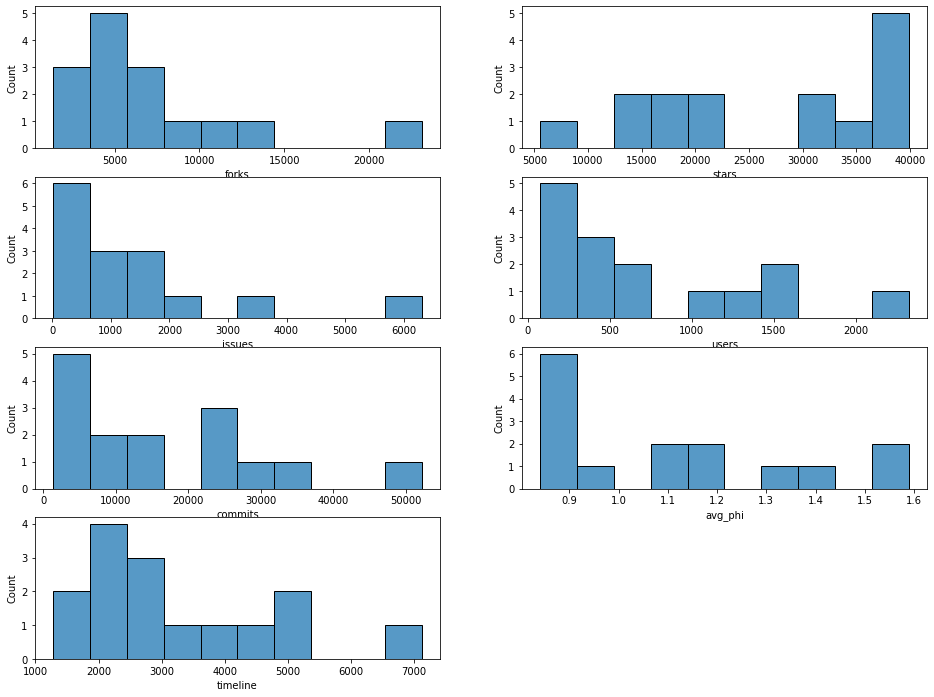

In [9]:
plt.figure(figsize=(16,12))

plt.subplot(4,2,1)
sns.histplot(df['forks'], bins=10)

plt.subplot(4,2,2)
sns.histplot(df['stars'], bins=10)

plt.subplot(4,2,3)
sns.histplot(df['issues'], bins=10)

plt.subplot(4,2,4)
sns.histplot(df['users'], bins=10)

plt.subplot(4,2,5)
sns.histplot(df['commits'], bins=10)

plt.subplot(4,2,6)
sns.histplot(df['avg_phi'], bins=10)

plt.subplot(4,2,7)
sns.histplot(df['timeline'], bins=10)

plt.show()

In [10]:
from social_phi import get_single_signal

def display_growth(col):
    for data in all_data:
        sig, _, _ = get_single_signal(data[col], time_scale=24*3600, binarize=False)
        cum_sig = [sig[:i+1].sum() for i in range(len(sig))]
        plt.plot(cum_sig)
        
def display_commit_growth():
    for data in all_data:
        act = flatten(data['activities'].values())
        sig, _, _ = get_single_signal(act, time_scale=24*3600, binarize=False)
        cum_sig = [sig[:i+1].sum() for i in range(len(sig))]
        plt.plot(cum_sig)

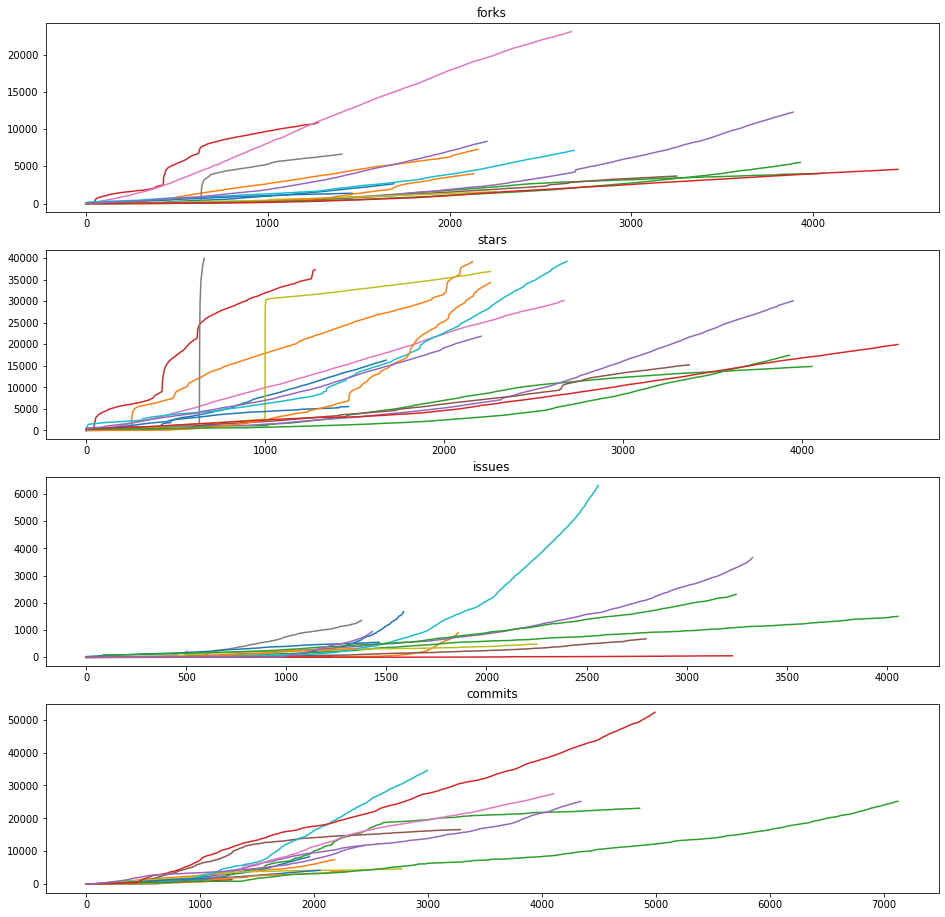

In [19]:
plt.figure(figsize=(16,16))

plt.subplot(4,1,1)
plt.title('forks')
display_growth('forks')

plt.subplot(4,1,2)
plt.title('stars')
display_growth('stars')

plt.subplot(4,1,3)
plt.title('issues')
display_growth('issues')

plt.subplot(4,1,4)
plt.title('commits')
display_commit_growth()
    
plt.show()

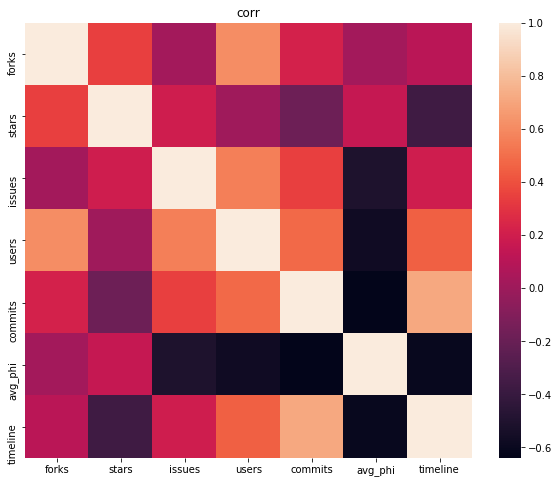

In [25]:
from sklearn.metrics import mutual_info_score, normalized_mutual_info_score, adjusted_mutual_info_score

plt.figure(figsize=(10,8))
# plt.subplot(1,2,1)
plt.title('corr')
sns.heatmap(df.corr())

# mis = np.zeros(shape=(df.shape[1], df.shape[1]))
# for i in range(df.shape[1]):
#     for j in range(df.shape[1]):
#         mis[i,j] = adjusted_mutual_info_score(df[df.columns[i]], df[df.columns[j]])

# plt.subplot(1,2,2)
# sns.heatmap(pd.DataFrame(mis, columns=df.columns, index=df.columns))
plt.show()